torch.Size([55000, 1, 28, 28])
torch.Size([55000, 1])
Starting PINN


/home/rees/Code/PoseExtraction/utils.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  epoch_loss += loss.data[0]
/home/rees/Code/PoseExtraction/utils.py:64: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  epoch_loss_val += loss.data[0]


Loss: 0.01940189301967621, Acc: 0.6272727272727273, Validation Acc: 0.853125
Loss: 0.005538737401366234, Acc: 0.903125, Validation Acc: 0.9125
Loss: 0.0029815095476806164, Acc: 0.9488636363636364, Validation Acc: 0.9224431818181819
Loss: 0.0020521359983831644, Acc: 0.9661931818181818, Validation Acc: 0.9355113636363637
Loss: 0.0013958208728581667, Acc: 0.9792613636363636, Validation Acc: 0.946590909090909
Loss: 0.000978998839855194, Acc: 0.9855113636363636, Validation Acc: 0.9556818181818182
Loss: 0.0007088595884852111, Acc: 0.9928977272727273, Validation Acc: 0.95625
Loss: 0.0005510523915290833, Acc: 0.9948863636363636, Validation Acc: 0.9497159090909091
Loss: 0.0004988798755221069, Acc: 0.9965909090909091, Validation Acc: 0.9525568181818181
Loss: 0.00041735084960237145, Acc: 0.9960227272727272, Validation Acc: 0.9491477272727272
Loss: 0.0003443050663918257, Acc: 0.9963068181818182, Validation Acc: 0.9403409090909091
Loss: 0.0002789056161418557, Acc: 0.9982954545454545, Validation Acc

Loss: 0.00023943906126078218, Acc: 0.9963068181818182, Validation Acc: 0.953125
Loss: 0.00030068590422160923, Acc: 0.99375, Validation Acc: 0.9585227272727272
Loss: 0.00023582790163345635, Acc: 0.9957386363636364, Validation Acc: 0.9377840909090909
Loss: 0.00024004941224120557, Acc: 0.9960227272727272, Validation Acc: 0.9605113636363637
Loss: 0.00023845667601563036, Acc: 0.9946022727272728, Validation Acc: 0.9693181818181819
Loss: 0.0003430936485528946, Acc: 0.9928977272727273, Validation Acc: 0.9485795454545455
Loss: 0.00027329279691912234, Acc: 0.9948863636363636, Validation Acc: 0.9588068181818182
Loss: 0.00019602381507866085, Acc: 0.9965909090909091, Validation Acc: 0.9582386363636364
Loss: 0.0002631457173265517, Acc: 0.9943181818181818, Validation Acc: 0.9661931818181818
Loss: 0.00028906832449138165, Acc: 0.9940340909090909, Validation Acc: 0.9588068181818182
Loss: 0.00010708018089644611, Acc: 0.9991477272727273, Validation Acc: 0.9673295454545454
Loss: 0.0001464987435610965, Acc:

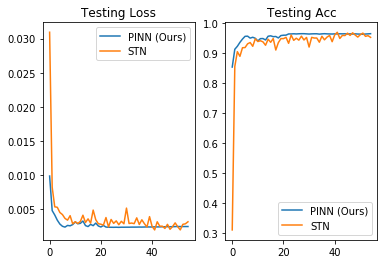

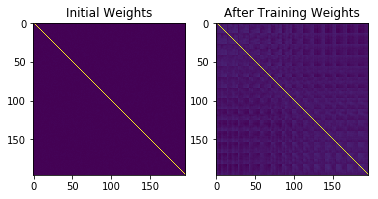

In [5]:
import importlib
import os
import argparse
import time

from torchvision import datasets
from torchvision import transforms
import torch
import torch as th
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

import datasets as ds
import models
import utils


# Training settings
# parser = argparse.ArgumentParser(description='PyTorch Runner for PINN')
# parser.add_argument('--batch_num', type=int, default=10, metavar='N',
#                     help='input number of batches to be processed')
# parser.add_argument('--epochs', type=int, default=10, metavar='N',
#                     help='number of epochs to train (default: 10)')
# parser.add_argument('--lr', type=float, default=0.001, metavar='LR',
#                     help='learning rate (default: 0.01)')
# parser.add_argument('--dataset', type=str, default='AffNIST', 
#                     help='Select Target Dataset')
# parser.add_argument('--display', action='store_true')
# args = parser.parse_args()


class Data():
    def __init_(self):
        pass
    
args = Data()
args.dataset = 'b'
args.epochs = 55
args.batch_num = 55
args.lr = 0.001
args.display = True

display = args.display
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if args.dataset == 'AffNIST':
    train_loader, test_loader, dataset_details = ds.AffNIST()
    batch_size, channel_num, height, width = dataset_details

elif args.dataset == 'Cifar10':
    train_loader, test_loader, dataset_details = ds.Cifar10()
    batch_size, channel_num, height, width = dataset_details 

epoch_num = args.epochs
batch_num = args.batch_num
learning_rate = args.lr

cnn = models.CNN(channel_num, (width, height)).to(device)
pinn = models.PINN(channel_num, (width, height)).to(device)
stn = models.STN(channel_num, (width, height)).to(device)

criterion_cnn = nn.CrossEntropyLoss()
criterion_pinn = nn.CrossEntropyLoss()
criterion_stn = nn.CrossEntropyLoss()

optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
optimizer_pinn = torch.optim.Adam(pinn.parameters(), lr=learning_rate)
optimizer_stn = torch.optim.Adam(stn.parameters(), lr=learning_rate)


train_cnn = False
train_pinn = True
train_stn = True

fig, ax = plt.subplots(1, 2)
fig2, ax2 = plt.subplots(1, 2)
ax2[0].imshow(utils.tensor_to_numpy_img(pinn.pose_norm.weights.cpu()))

ax2[0].set_title("Initial Weights")
ax2[1].set_title("After Training Weights")

ax[0].set_title('Testing Loss')
ax[1].set_title('Testing Acc')

if train_cnn:
    print("Starting CNN")
    t1 = time.time()
    cnn, cnn_loss, cnn_acc = utils.train_net(cnn, train_loader, test_loader, criterion_cnn, optimizer_cnn, batch_num, epoch_num)
    print("DONE TRAINING CNN: {}s".format(time.time() - t1))

    
    ax[0].plot(cnn_loss, label='CNN')
    ax[1].plot(cnn_acc, label='CNN')
    print("FINAL ACC:", cnn_acc[-1], '\n\n')

if train_pinn:
    print("Starting PINN")
    t2 = time.time()
    pinn, pinn_loss, pinn_acc = utils.train_net(pinn, train_loader, test_loader, criterion_pinn, optimizer_pinn, batch_num, epoch_num)
    print("DONE TRAINING PINN: {}s".format(time.time() - t2))

    ax[0].plot(pinn_loss, label='PINN (Ours)')
    ax[1].plot(pinn_acc, label='PINN (Ours)')
    print("FINAL ACC:", pinn_acc[-1], '\n\n')
    print(pinn.pose_norm.weights)

if train_stn:
    print("Starting STN")
    t2 = time.time()
    stn, stn_loss, stn_acc = utils.train_net(stn, train_loader, test_loader, criterion_stn, optimizer_stn, batch_num, epoch_num)
    print("DONE TRAINING STN: {}s".format(time.time() - t2))

    ax[0].plot(stn_loss, label='STN')
    ax[1].plot(stn_acc, label='STN')
    print("FINAL ACC:", stn_acc[-1], '\n\n')

ax[0].legend(loc='best')
ax[1].legend(loc='best')

ax2[1].imshow(utils.tensor_to_numpy_img(pinn.pose_norm.weights.cpu()))

if display:
    plt.show()
    

In [8]:
import torch
import torch.nn as nn
from torchvision import models

original_model = pinn

class PoseExtractor(nn.Module):
            def __init__(self):
                super(PoseExtractor, self).__init__()
                self.features = nn.Sequential(
                    # stop at conv4
                    original_model.layer1,
                    original_model.pose_norm
                )
            def forward(self, x):
                x = self.features(x)
                return x
            
class PrePoseVisual(nn.Module):
            def __init__(self):
                super(PrePoseVisual, self).__init__()
                self.features = nn.Sequential(
                    # stop at conv4
                    original_model.layer1,
                    original_model.pose_norm.channel_compress
                )
            def forward(self, x):
                x = self.features(x)
                return x

pose_extractor = PoseExtractor()
pre_pose_visual = PrePoseVisual()

img_block = 4
for index, (imgs, labels) in enumerate(train_loader):
    if index == img_block:
        break

(8.113370895385742, 6.456110000610352) (0.6681008338928223, -0.7440707683563232)
(9.486282348632812, 3.5546875) (0.8607034683227539, -0.5091065168380737)
(11.794126510620117, 5.301746368408203) (0.5091174840927124, -0.8606970310211182)
(3.4243364334106445, 5.86592960357666) (0.5922672152519226, -0.8057416081428528)
(9.282493591308594, 4.943975448608398) (0.5725656747817993, -0.8198588490486145)
(9.432677268981934, 4.558507919311523) (0.6437723636627197, -0.7652170658111572)
(6.2708353996276855, 5.474503517150879) (0.6910508275032043, -0.7228063344955444)
(7.942785263061523, 5.178977966308594) (0.6681271195411682, -0.7440471053123474)
(7.566710948944092, 6.389072895050049) (0.9298275113105774, -0.36799561977386475)
(8.43321418762207, 8.173583984375) (0.6359622478485107, -0.771720290184021)
(8.535447120666504, 7.081218242645264) (0.6023463606834412, -0.7982348799705505)
(4.27880334854126, 7.029320240020752) (0.3772326409816742, -0.9261184930801392)
(11.088778495788574, 3.1667613983154297

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(6.160401821136475, 5.622454643249512) (0.8115309476852417, -0.584309458732605)
(3.5941882133483887, 5.147693634033203) (0.5067009329795837, -0.8621218204498291)
(6.361327648162842, 5.199250221252441) (0.5569220185279846, -0.8305648565292358)
(1.2811760902404785, 8.634759902954102) (0.29055628180503845, -0.9568579196929932)
(6.470666885375977, 10.110628604888916) (0.43024545907974243, -0.9027120471000671)
(6.485444068908691, 7.168510437011719) (0.5985087156295776, -0.801116406917572)
(0.22228002548217773, 4.983222007751465) (0.3680403530597687, -0.9298098087310791)


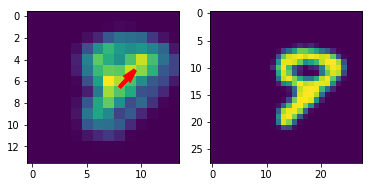

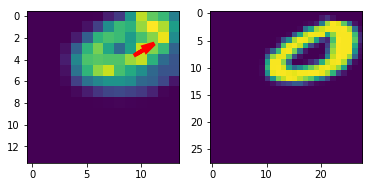

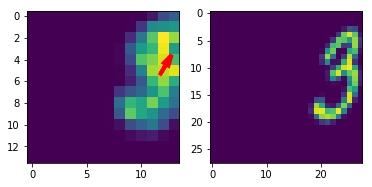

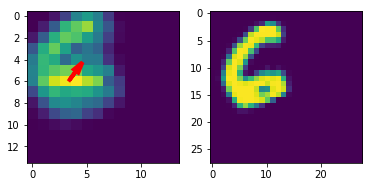

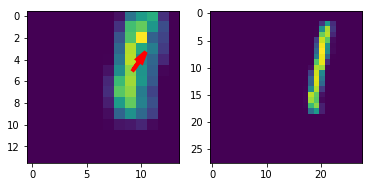

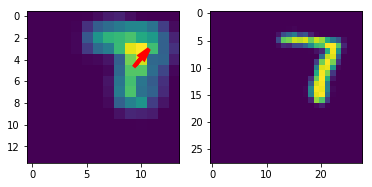

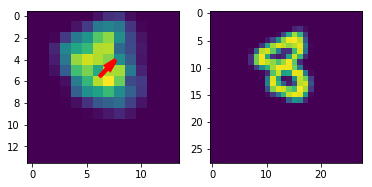

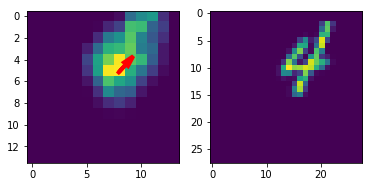

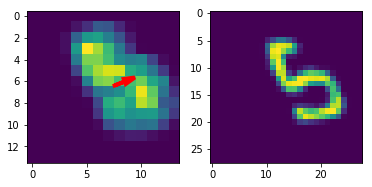

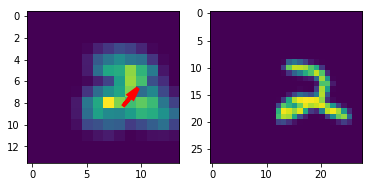

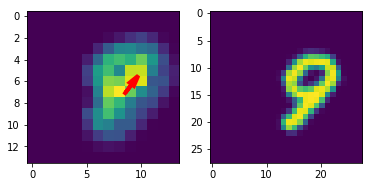

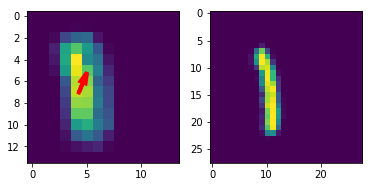

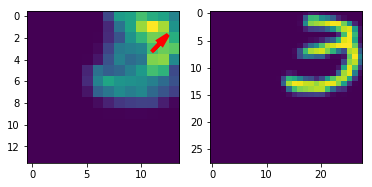

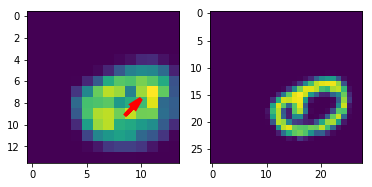

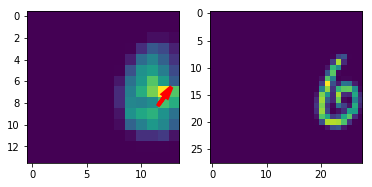

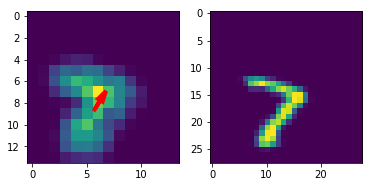

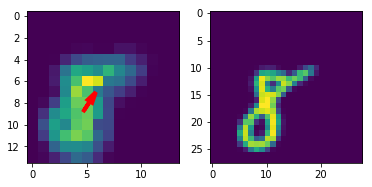

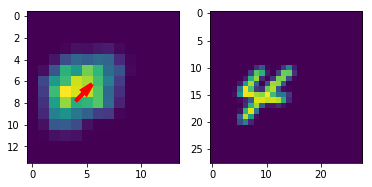

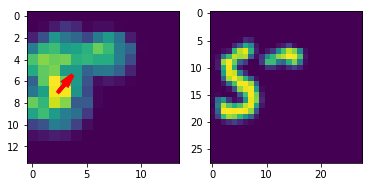

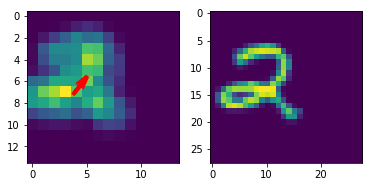

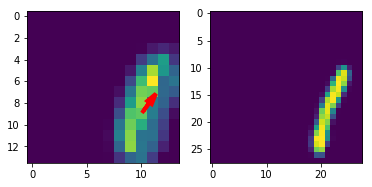

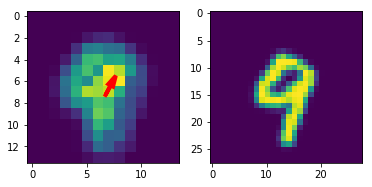

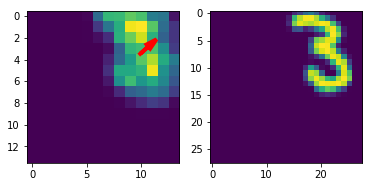

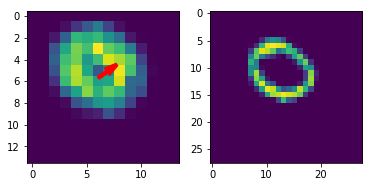

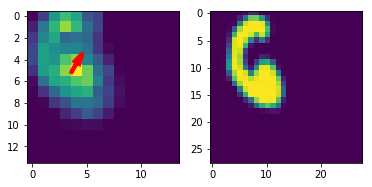

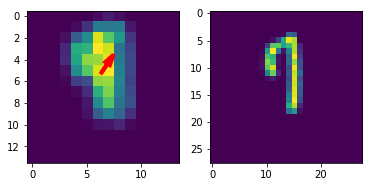

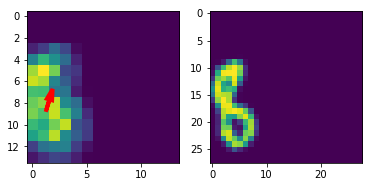

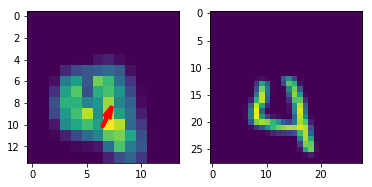

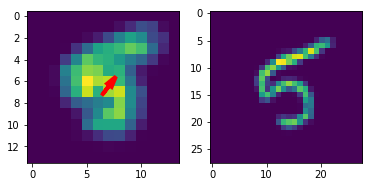

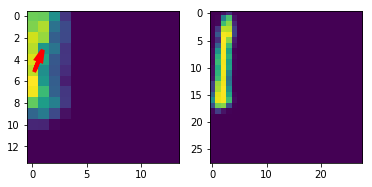

In [10]:
for index in range(30):
    fig, ax = plt.subplots(1, 2)
    index = index + 30
    _, means, orientations, confidence, theta, (L1, L2) = pose_extractor(imgs[index:index+1].cuda())
    img_shape = (14, 14)
    
    arrow_scale = 1
    scale = 1

    mean_x = means[0, 0, 0].cpu().data.numpy() * scale
    mean_y = means[0, 1, 0].cpu().data.numpy() * scale

    rot = orientations[0].cpu().data.numpy()
    arrow_start = (mean_x, img_shape[1] - mean_y)
    arrow_end = (rot[0, 0]*arrow_scale, -1*rot[0, 1]*arrow_scale)
    print(arrow_start, arrow_end)

    ax[0].arrow(arrow_start[0], arrow_start[1], arrow_end[0], arrow_end[1], 
                head_width=0.5, head_length=1, fc='red', ec='r', linewidth=4, alpha=1)
    ax[0].imshow(utils.tensor_to_numpy_img(pre_pose_visual(imgs[index:index+1].cuda())))
    ax[1].imshow(utils.tensor_to_numpy_img(imgs[index:index+1].cuda()))
plt.show()